In [5]:
import os
import sys
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../..')))
import networkx as nx
import matplotlib.pyplot as plt 
import time
import gc
import pandas as pd
import numpy as np
from ranking import *

In [12]:
df = pd.read_csv("./../../res/movie/rating.csv")

In [13]:
df.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40


In [4]:
print(min(df['movieId']))
print(max(df['userId']))

1
138493


In [5]:
source = 'userId'
target = 'movieId'

source_uniq = df[source].unique()
target_uniq = df[target].unique()

obj_source_to_N = dict(zip(source_uniq, range(len(source_uniq))))
obj_target_to_N = dict(zip(target_uniq,
                            range(len(source_uniq), len(source_uniq) + len(target_uniq))))

N_to_obj = {}
N_to_obj.update({i: (obj, 'source') for i, obj in enumerate(source_uniq)})
N_to_obj.update({i: (obj, 'target') for i, obj in enumerate(target_uniq, start=len(source_uniq))})

data = pd.DataFrame()
count_top = len(source_uniq) + len(target_uniq)
start_node = df[source].apply(lambda x: obj_source_to_N[x])
end_node = df[target].apply(lambda x: obj_target_to_N[x])

data['userId'] = start_node
data['movieId'] = end_node
data['rating'] = df['rating']

In [6]:
def measure_pagerank_time(data, user_id_column,
                          movie_id_column, rating_column,
                          pers=1, count_measure=3, directional = False):
    """
    Измеряет время выполнения создания объекта PageRank и время вычисления 
    PageRank для заданных данных, уменьшая влияние сборщика мусора.

    Args:
        data: DataFrame с данными рекомендаций.
        user_id_column: Название столбца с ID пользователей.
        movie_id_column: Название столбца с ID фильмов.
        rating_column: Название столбца с рейтингом.
        pers: Параметр pers для PagerankFactory.
        count_measure: Количество измерений (для усреднения).

    Returns:
        Tuple: Время создания объекта PageRank (в секундах), 
               время выполнения get_pagerank (в секундах).
    """
    gc.collect()
    
    using = nx.DiGraph() if directional else nx.Graph()

    # Измеряем время создания объекта
    start_time_creation = time.time()
    graph = nx.from_pandas_edgelist(data, user_id_column, movie_id_column,
                                edge_attr=rating_column, create_using=using)
    end_time_creation = time.time()
    creation_time = end_time_creation - start_time_creation

    # Измеряем время выполнения get_pagerank
    start_time_calculation = time.time()
    for _ in range(count_measure):
        _ = nx.pagerank(graph)
    end_time_calculation = time.time()
    execution_time = (end_time_calculation - start_time_calculation) / count_measure

    return creation_time, execution_time


def measure_hits_time(data, user_id_column,
                          movie_id_column, rating_column,
                          pers=1, count_measure=3, directional = False):
    """
    Измеряет время выполнения создания объекта PageRank и время вычисления 
    PageRank для заданных данных, уменьшая влияние сборщика мусора.

    Args:
        data: DataFrame с данными рекомендаций.
        user_id_column: Название столбца с ID пользователей.
        movie_id_column: Название столбца с ID фильмов.
        rating_column: Название столбца с рейтингом.
        pers: Параметр pers для PagerankFactory.
        count_measure: Количество измерений (для усреднения).

    Returns:
        Tuple: Время создания объекта PageRank (в секундах), 
               время выполнения get_pagerank (в секундах).
    """
    gc.collect()
    
    using = nx.DiGraph() if directional else nx.Graph()

    # Измеряем время создания объекта
    start_time_creation = time.time()
    graph = nx.from_pandas_edgelist(data, user_id_column, movie_id_column,
                                edge_attr=rating_column, create_using=using)
    end_time_creation = time.time()
    creation_time = end_time_creation - start_time_creation

    # Измеряем время выполнения get_pagerank
    start_time_calculation = time.time()
    for _ in range(count_measure):
        _ = nx.hits(graph)
    end_time_calculation = time.time()
    execution_time = (end_time_calculation - start_time_calculation) / count_measure

    return creation_time, execution_time

def plot_time(filename):
    """
    Строит график зависимости времени выполнения  от размера выборки.

    Args:
        filename: Имя файла CSV с данными о времени выполнения.
    """
    df = pd.read_excel(filename)

    # Строим график
    plt.plot(df['Размер выборки'], df['Время выполнения'], marker='o')

    # Настраиваем оси и заголовок графика
    plt.xlabel('Размер выборки')
    plt.ylabel('Время выполнения (секунды)')
    plt.title('Зависимость времени выполнения  от размера выборки')
    plt.grid()

    # Отображаем график
    plt.show()

Время создания: 5.7059 секунд
Время выполнения: 4.8554 секунд
Размер 0.1
Время создания: 12.9607 секунд
Время выполнения: 9.7006 секунд
Размер 0.2
Время создания: 17.8289 секунд
Время выполнения: 13.6889 секунд
Размер 0.30000000000000004
Время создания: 24.4936 секунд
Время выполнения: 18.6766 секунд
Размер 0.4
Время создания: 28.6733 секунд
Время выполнения: 20.5521 секунд
Размер 0.5
Время создания: 34.3603 секунд
Время выполнения: 25.6193 секунд
Размер 0.6
Время создания: 40.3095 секунд
Время выполнения: 29.6132 секунд
Размер 0.7000000000000001
Время создания: 46.3644 секунд
Время выполнения: 33.7968 секунд
Размер 0.8
Время создания: 52.9206 секунд
Время выполнения: 41.8013 секунд
Размер 0.9
Время создания: 60.0287 секунд
Время выполнения: 45.5466 секунд
Размер 1.0


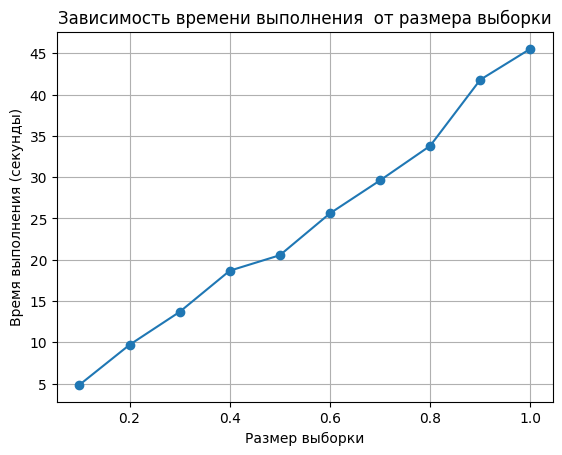

In [7]:
# Создаем список для хранения данных о времени выполнения
results = []

# Пример использования:
for i in np.arange(0.1, 1 + 0.1, 0.1):
    d = data.sample(frac=i)
    creation_time, execution_time = measure_pagerank_time(d, 'userId', 'movieId', 'rating')
    print(f"Время создания: {creation_time:.4f} секунд")
    print(f"Время выполнения: {execution_time:.4f} секунд")
    print(f"Размер {i}")
    results.append([i, execution_time, creation_time])

# Создаем DataFrame из полученных данных
results_df = pd.DataFrame(results, columns=['Размер выборки', 'Время выполнения', 'Время создания'])

# Сохраняем DataFrame в файл CSV
results_df.to_excel('./pagerank/networkx_pagerank_results_movielens.xlsx', index=False)
plot_time('./pagerank/networkx_pagerank_results_movielens.xlsx')

Время создания: 5.6541 секунд
Время выполнения: 4.4875 секунд
Размер 0.1
Время создания: 10.9762 секунд
Время выполнения: 8.5709 секунд
Размер 0.2
Время создания: 16.6939 секунд
Время выполнения: 13.1860 секунд
Размер 0.30000000000000004
Время создания: 22.4945 секунд
Время выполнения: 17.3651 секунд
Размер 0.4
Время создания: 28.6699 секунд
Время выполнения: 23.2126 секунд
Размер 0.5
Время создания: 34.0605 секунд
Время выполнения: 26.3041 секунд
Размер 0.6
Время создания: 40.1922 секунд
Время выполнения: 30.5148 секунд
Размер 0.7000000000000001
Время создания: 47.1390 секунд
Время выполнения: 36.5171 секунд
Размер 0.8
Время создания: 52.6438 секунд
Время выполнения: 42.6829 секунд
Размер 0.9
Время создания: 59.2181 секунд
Время выполнения: 47.7066 секунд
Размер 1.0


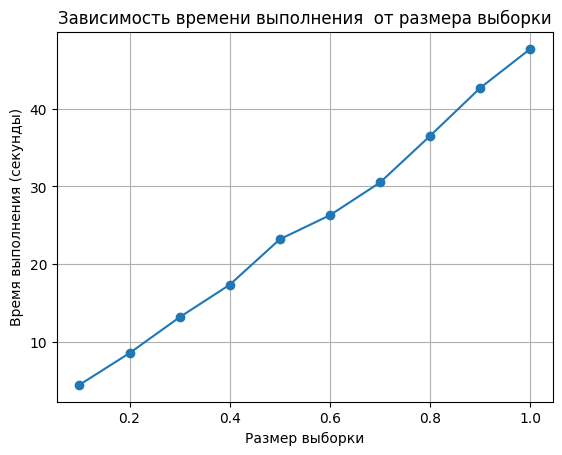

In [8]:
# Создаем список для хранения данных о времени выполнения
results = []

# Пример использования:
for i in np.arange(0.1, 1 + 0.1, 0.1):
    d = data.sample(frac=i)
    creation_time, execution_time = measure_hits_time(d, 'userId', 'movieId', 'rating', count_measure=3)
    print(f"Время создания: {creation_time:.4f} секунд")
    print(f"Время выполнения: {execution_time:.4f} секунд")
    print(f"Размер {i}")
    results.append([i, execution_time, creation_time])

# Создаем DataFrame из полученных данных
results_df = pd.DataFrame(results, columns=['Размер выборки', 'Время выполнения', 'Время создания'])

results_df.to_excel('./hits/networkx_hits_results_movielens.xlsx', index=False)
plot_time('./pagerank/networkx_hits_results_movielens.xlsx')

Время создания: 1.6446 секунд
Время выполнения: 2.4258 секунд
Размер 0.1
Время создания: 3.9237 секунд
Время выполнения: 3.8176 секунд
Размер 0.2
Время создания: 5.3988 секунд
Время выполнения: 5.4109 секунд
Размер 0.30000000000000004
Время создания: 6.8583 секунд
Время выполнения: 6.7481 секунд
Размер 0.4
Время создания: 8.4207 секунд
Время выполнения: 7.2617 секунд
Размер 0.5
Время создания: 9.9180 секунд
Время выполнения: 9.5649 секунд
Размер 0.6
Время создания: 11.6045 секунд
Время выполнения: 8.6711 секунд
Размер 0.7000000000000001
Время создания: 12.8077 секунд
Время выполнения: 10.1462 секунд
Размер 0.8
Время создания: 14.3198 секунд
Время выполнения: 10.4490 секунд
Размер 0.9
Время создания: 15.7783 секунд
Время выполнения: 11.1545 секунд
Размер 1.0


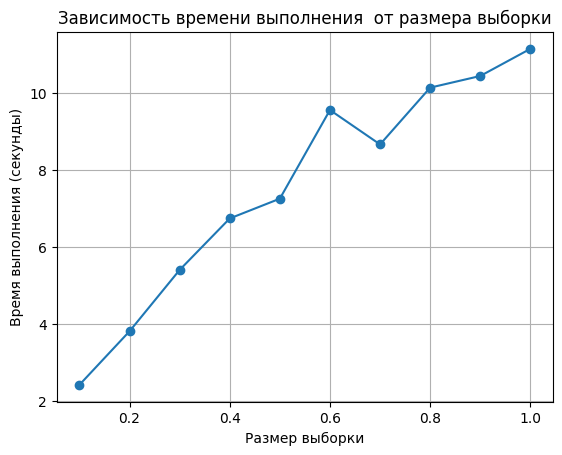

In [9]:
data = pd.read_csv('./res/google_graph/web-Google.txt', sep="\t", header=None)
data.columns = ['source', 'target']
data['edge_attr'] = 1
# Создаем список для хранения данных о времени выполнения
results = []

# Пример использования:
for i in np.arange(0.1, 1 + 0.1, 0.1):
    d = data.sample(frac=i)
    creation_time, execution_time = measure_hits_time(d, 'source', 'target', 'edge_attr', count_measure=3, directional=True)
    print(f"Время создания: {creation_time:.4f} секунд")
    print(f"Время выполнения: {execution_time:.4f} секунд")
    print(f"Размер {i}")
    results.append([i, execution_time, creation_time])

# Создаем DataFrame из полученных данных
results_df = pd.DataFrame(results, columns=['Размер выборки', 'Время выполнения', 'Время создания'])

results_df.to_excel('./hits/networkx_hits_results_web.xlsx', index=False)
plot_time('./hits/networkx_hits_results_web.xlsx')

Время создания: 1.6019 секунд
Время выполнения: 1.1045 секунд
Размер 0.1
Время создания: 4.0056 секунд
Время выполнения: 1.9982 секунд
Размер 0.2
Время создания: 5.4160 секунд
Время выполнения: 2.8687 секунд
Размер 0.30000000000000004
Время создания: 6.8976 секунд
Время выполнения: 3.6863 секунд
Размер 0.4
Время создания: 8.4426 секунд
Время выполнения: 4.4637 секунд
Размер 0.5
Время создания: 9.8879 секунд
Время выполнения: 5.2251 секунд
Размер 0.6
Время создания: 11.4464 секунд
Время выполнения: 6.0470 секунд
Размер 0.7000000000000001
Время создания: 12.9814 секунд
Время выполнения: 6.6884 секунд
Размер 0.8
Время создания: 14.5452 секунд
Время выполнения: 7.6791 секунд
Размер 0.9
Время создания: 16.0013 секунд
Время выполнения: 8.2121 секунд
Размер 1.0


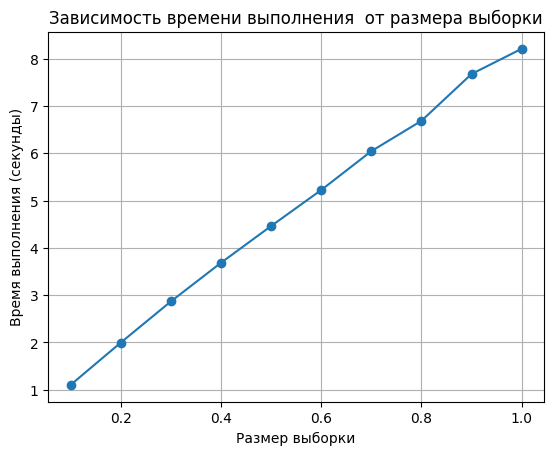

In [10]:
data = pd.read_csv('./res/google_graph/web-Google.txt', sep="\t", header=None)
data.columns = ['source', 'target']
data['edge_attr'] = 1
# Создаем список для хранения данных о времени выполнения
results = []

# Пример использования:
for i in np.arange(0.1, 1 + 0.1, 0.1):
    d = data.sample(frac=i)
    creation_time, execution_time = measure_pagerank_time(d, 'source', 'target', 'edge_attr', count_measure=3, directional=True)
    print(f"Время создания: {creation_time:.4f} секунд")
    print(f"Время выполнения: {execution_time:.4f} секунд")
    print(f"Размер {i}")
    results.append([i, execution_time, creation_time])

# Создаем DataFrame из полученных данных
results_df = pd.DataFrame(results, columns=['Размер выборки', 'Время выполнения', 'Время создания'])

results_df.to_excel('./hits/networkx_pagerank_results_web.xlsx', index=False)
plot_time('./hits/networkx_pagerank_results_web.xlsx')